# demo03_svm.ipynb  SVM分类

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

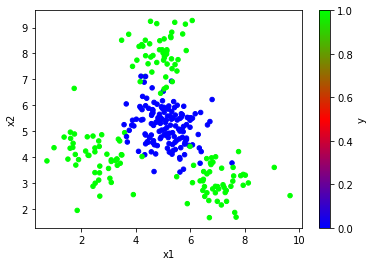

In [4]:
data = pd.read_csv('multiple2.txt', header=None, names=['x1', 'x2', 'y'])
data.plot.scatter(x='x1', y='x2', c='y', cmap='brg')

In [5]:
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
# 整理数据集，拆分测试集训练集
x, y = data.iloc[:, :-1], data['y']
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.25, random_state=7)
model = svm.SVC(kernel='linear')
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.classification_report(test_y, pred_test_y))

             precision    recall  f1-score   support

          0       0.69      0.90      0.78        40
          1       0.83      0.54      0.66        35

avg / total       0.75      0.73      0.72        75



In [6]:
data.head()

x1    x2  y
0  5.35  4.48  0
1  6.72  5.37  0
2  3.57  5.25  0
3  4.77  7.65  1
4  2.25  4.07  1

## 暴力绘制分类边界线

In [16]:
# 从x的min~max 拆出100个x坐标
# 从y的min~max 拆出100个y坐标  一共组成10000个坐标点  预测每个坐标点的类别标签  绘制散点
xs = np.linspace(data['x1'].min(), data['x1'].max(), 100)
ys = np.linspace(data['x2'].min(), data['x2'].max(), 100)
points = []
for x in xs:
    for y in ys:
        points.append([x, y])
points = np.array(points)
# 预测每个坐标点的类别标签  绘制散点
point_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=point_labels, cmap='gray')
plt.scatter(test_x['x1'], test_x['x2'], c=test_y, cmap='brg')

## 多项式核函数

             precision    recall  f1-score   support

          0       0.93      0.93      0.93        40
          1       0.91      0.91      0.91        35

avg / total       0.92      0.92      0.92        75



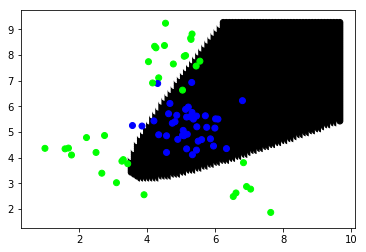

In [21]:
model = svm.SVC(kernel='poly', degree=2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.classification_report(test_y, pred_test_y))
# 预测每个坐标点的类别标签  绘制散点
point_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=point_labels, cmap='gray')
plt.scatter(test_x['x1'], test_x['x2'], c=test_y, cmap='brg')

## 径向基核函数

In [37]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# print(sm.classification_report(test_y, pred_test_y))
# 预测每个坐标点的类别标签  绘制散点
point_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=point_labels, cmap='gray')
plt.scatter(train_x['x1'], train_x['x2'], c=train_y, cmap='brg')

## 通过网格搜索寻求最优超参数组合

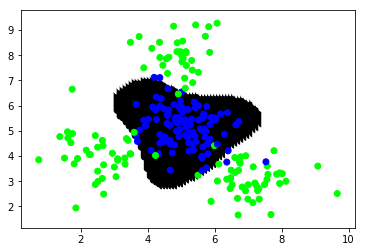

In [38]:
model = svm.SVC()

# 网格搜索
params = [{'kernel':['linear'], 'C':[1, 10, 100]}, 
          {'kernel':['poly'], 'degree':[2, 3]}, 
          {'kernel':['rbf'], 'C':[1, 10, 100], 'gamma':[1, 0.1, 0.001]}]
model = ms.GridSearchCV(model, params, cv=5)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
# print(sm.classification_report(test_y, pred_test_y))
# 预测每个坐标点的类别标签  绘制散点
point_labels = model.predict(points)
plt.scatter(points[:,0], points[:,1], c=point_labels, cmap='gray')
plt.scatter(train_x['x1'], train_x['x2'], c=train_y, cmap='brg')

In [40]:
print(model.best_params_)
print(model.best_score_)
print(model.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9511111111111111
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
